Write an algorithm that computes and plots the histogram of an image and
also reports the minimum pixel value and the maximum pixel value in the image. Then execute
your algorithm to compare the histograms and extreme values before and after contrast
stretching of image Oakland.png for each of the three approaches in the previous task.

More specifically, for the first contrast-stretching approach, show the histogram and extreme
values for each of the three channels (R, G, B) of both the input image and the output image.
For the second approach, show the histogram and extreme values of only the gray value
representation (Y) of both the input image and the output image after conversion. For the
third approach, show the histogram and extreme values of only the value channel (V) of both
the input image and the output image after conversion.
To facilitate visual comparison, present the histograms of the input image and corresponding
output image side by side in each case.

In [31]:
#Load libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


Original (BGR)
Min:113
Max:231
Min:96
Max:230
Min:70
Max:222
Stretched (BGR)
Min:0
Max:255
Min:0
Max:255
Min:0
Max:255


(0.0, 256.0)

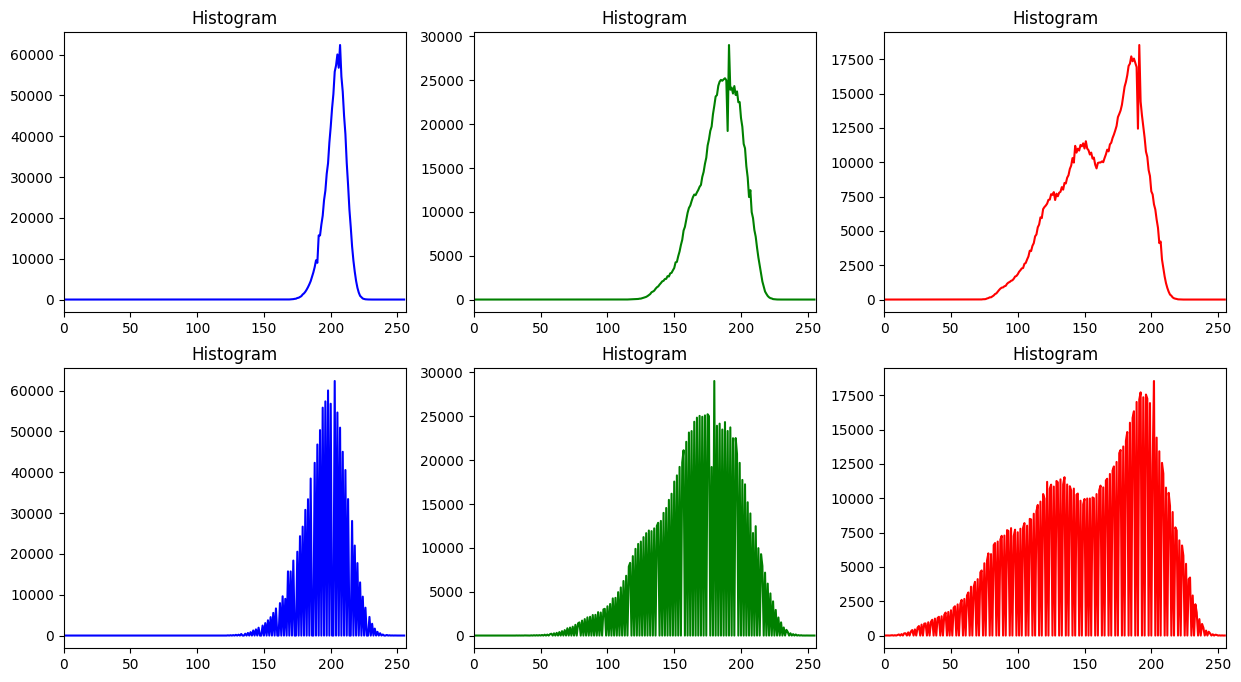

In [32]:
# Approach 1 RGB
def getHistogram(img):
    histogram = np.zeros((256), dtype=int)
    #print(histogram)

    for row in img:
        for pixel_value in row:
            histogram[pixel_value] += 1

    reportMinMax(histogram)
    
    return histogram
    
def reportMinMax(hist):
    # Find the indices of non-zero elements
    non_zero_indices = np.nonzero(hist)

    # Find the index of the lowest non-zero element
    min = non_zero_indices[0].min()

    # Find the index of the highest non-zero element
    max=  non_zero_indices[0].max()

    print("Min:" + str(min))
    print("Max:" + str(max))

file = 'Oakland.png'
img_bgr = cv2.imread(file)
file2 = 'OaklandBGRStretched.png'
img_bgr_stretched = cv2.imread(file2)

b, g, r = cv2.split(img_bgr)
bs,gs,rs = cv2.split(img_bgr_stretched)

print("Original (BGR)")
h1 = getHistogram(b)
h2 = getHistogram(g)
h3 = getHistogram(r)
print("Stretched (BGR)")
h4 = getHistogram(bs)
h5 = getHistogram(gs)
h6 = getHistogram(rs)


fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot the histogram in the first subplot
axes[0,0].set_title('Histogram')
axes[0,0].plot(h1, color='blue')
axes[0,0].set_xlim([0, 256])

# Plot the histogram in the second subplot
axes[0,1].set_title('Histogram')
axes[0,1].plot(h2, color='green')
axes[0,1].set_xlim([0, 256])

# Plot the histogram in the first subplot
axes[0,2].set_title('Histogram')
axes[0,2].plot(h3, color='red')
axes[0,2].set_xlim([0, 256])

# Plot the histogram in the second subplot
axes[1,0].set_title('Histogram')
axes[1,0].plot(h4, color='blue')
axes[1,0].set_xlim([0, 256])
# Plot the histogram in the first subplot
axes[1,1].set_title('Histogram')
axes[1,1].plot(h5, color='green')
axes[1,1].set_xlim([0, 256])

# Plot the histogram in the second subplot
axes[1,2].set_title('Histogram')
axes[1,2].plot(h6, color='red')
axes[1,2].set_xlim([0, 256])


Original
Min:92
Max:225
Stretched
Min:43
Max:252


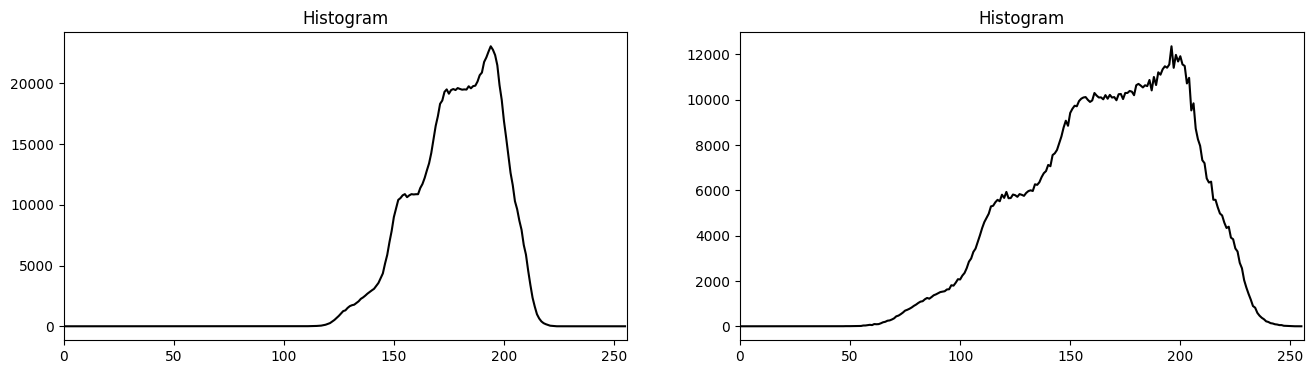

In [33]:
# Approach 2 Grey
def getHistogram(img):
    histogram = np.zeros((256), dtype=int)
    #print(histogram)

    for row in img:
        for pixel_value in row:
            histogram[pixel_value] += 1
    return histogram
    
#given histogram print the min and max values
def reportMinMax(hist):
    # Find the indices of non-zero elements
    non_zero_indices = np.nonzero(hist)

    # Find the index of the lowest non-zero element
    min = non_zero_indices[0].min()

    # Find the index of the highest non-zero element
    max=  non_zero_indices[0].max()

    print("Min:" + str(min))
    print("Max:" + str(max))
    

# Load file
file = 'Oakland.png'
img_grey = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
file2 = 'OaklandGreyStretched.png'
img_grey_stretched = cv2.imread(file2,cv2.IMREAD_GRAYSCALE)

histogramOld = getHistogram(img_grey)
histogramNew = getHistogram(img_grey_stretched)

print("Original")
reportMinMax(histogramOld)
print("Stretched")
reportMinMax(histogramNew)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot the histogram in the first subplot
ax1.set_title('Histogram')
ax1.plot(histogramOld, color='black')
ax1.set_xlim([0, 256])

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(histogramNew, color='black')
ax2.set_xlim([0, 256])

plt.show()



Original
Min:113
Max:231
Stretched
Min:74
Max:255


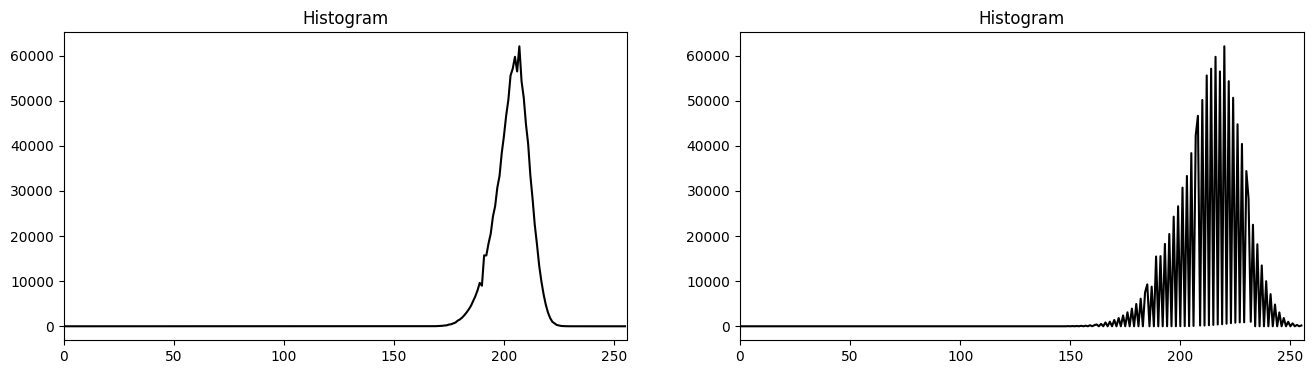

In [34]:
# Approach 3 HSV
def getHistogram(img):
    histogram = np.zeros((256), dtype=int)
    #print(histogram)

    for row in img:
        for pixel_value in row:
            histogram[pixel_value] += 1
    return histogram
    
# Load file
file = 'Oakland.png'
img_bgr = cv2.imread(file)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_hsv = img_hsv[:, :, 2] 
file2 = 'OaklandGreyStretched.png'
img_bgr_stretched = cv2.imread(file2)
img_hsv_stretched = cv2.cvtColor(img_bgr_stretched, cv2.COLOR_BGR2HSV)
img_hsv_stretched = img_hsv_stretched[:, :, 2] 

histogramOld = getHistogram(img_hsv)
histogramNew = getHistogram(img_hsv_stretched)

print("Original")
reportMinMax(histogramOld)
print("Stretched")
reportMinMax(histogramNew)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot the histogram in the first subplot
ax1.set_title('Histogram')
ax1.plot(histogramOld, color='black')
ax1.set_xlim([0, 256])

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(histogramNew, color='black')
ax2.set_xlim([0, 256])

plt.show()

